<a href="https://colab.research.google.com/github/himashi27/Design-and-Analysis-of-Algorithms-Lab-assignment/blob/ass.2/lab_ass__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 — Scheduling TV Commercials to Maximize Impact (Greedy)

Description:-

TV networks need to schedule advertisements to maximize total revenue without overlapping air slots.
Each commercial has a deadline and a profit.
Using a Greedy (Job Sequencing) approach, we schedule the most profitable commercials first within their deadlines.

🗓 Scheduled Ads by Slot: ['Ad C', 'Ad A', 'Ad E']
💰 Total Revenue: 142
⏱ Execution Time: 0.014343s
💾 Memory Used: 0.1133 MiB


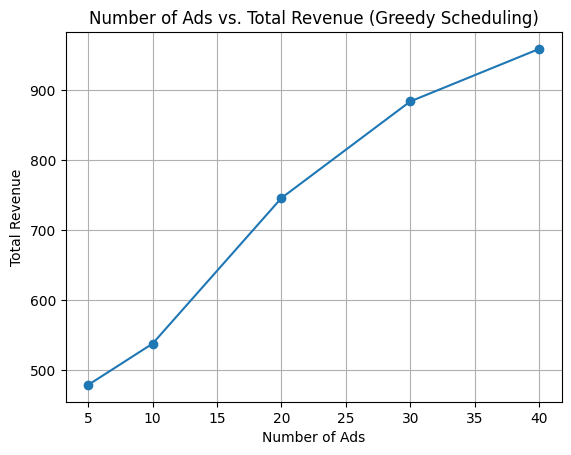

In [1]:
#  Problem 1: TV Commercial Scheduling (Greedy – Job Sequencing)

!pip install memory_profiler matplotlib -q

import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

#  Step 1: Input Model
ads = [
    ("Ad A", 2, 100),  # (id, deadline, profit)
    ("Ad B", 1, 19),
    ("Ad C", 2, 27),
    ("Ad D", 1, 25),
    ("Ad E", 3, 15)
]

#  Step 2: Greedy Algorithm Implementation
def job_sequencing(ads):
    ads.sort(key=lambda x: x[2], reverse=True)
    max_deadline = max(ad[1] for ad in ads)
    result = [None] * (max_deadline + 1)
    total_profit = 0

    for ad in ads:
        ad_id, deadline, profit = ad
        for slot in range(deadline, 0, -1):
            if result[slot] is None:
                result[slot] = ad_id
                total_profit += profit
                break
    return result[1:], total_profit

# Step 3: Run & Profile
start = time.time()
mem_used = memory_usage((job_sequencing, (ads,)), max_iterations=1)
schedule, profit = job_sequencing(ads)
end = time.time()

print("🗓 Scheduled Ads by Slot:", schedule)
print(f"💰 Total Revenue: {profit}")
print(f"⏱ Execution Time: {end - start:.6f}s")
print(f"💾 Memory Used: {max(mem_used) - min(mem_used):.4f} MiB")

# Step 4: Visualization
num_ads = [5, 10, 20, 30, 40]
profits = []

import random
for n in num_ads:
    random_ads = [(f"Ad{i}", random.randint(1, 5), random.randint(10, 200)) for i in range(n)]
    _, p = job_sequencing(random_ads)
    profits.append(p)

plt.plot(num_ads, profits, marker='o')
plt.title("Number of Ads vs. Total Revenue (Greedy Scheduling)")
plt.xlabel("Number of Ads")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

#  Step 5: Analysis
# • Time Complexity: O(n²) in worst case (for deadline checks)
# • Space Complexity: O(n)
# • Real-World Insight: Works well for limited time slots and high profit variations.


Problem 2 — Maximizing Profit with Limited Budget (Dynamic Programming – 0/1 Knapsack)

Description:-

You’re planning investments with a fixed budget.
Each project has a cost (weight) and an expected profit (value).
The goal is to maximize profit without exceeding the total budget (capacity).

We solve this classic problem using Dynamic Programming (0/1 Knapsack).

💼 Maximum Profit within Budget: 90
⏱ Execution Time: 0.023238 seconds
💾 Memory Used: 0.0000 MiB


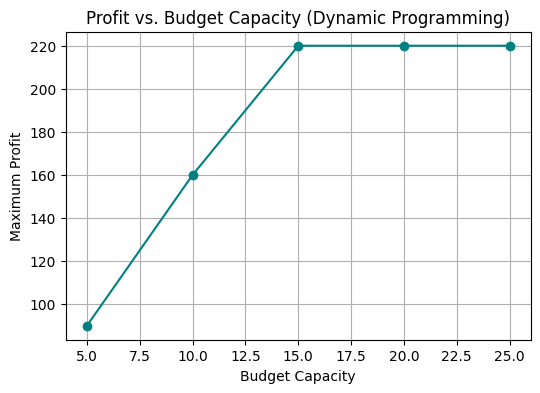

In [2]:
# Problem 2: Maximizing Profit with Limited Budget (Dynamic Programming – 0/1 Knapsack)

!pip install memory_profiler matplotlib -q

import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# Step 1: Input Example
weights = [2, 3, 4, 5]   # Cost of each project/item
profits = [40, 50, 60, 70]  # Profit of each project/item
capacity = 5              # Total available budget

# Step 2: Dynamic Programming Implementation
def knapsack_dp(weights, profits, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    # Build table bottom-up
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(profits[i-1] + dp[i-1][w - weights[i-1]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]
    return dp[n][capacity]

# Step 3: Run & Profile
start_time = time.time()
mem_used = memory_usage((knapsack_dp, (weights, profits, capacity)), max_iterations=1)
max_profit = knapsack_dp(weights, profits, capacity)
end_time = time.time()

print(f"💼 Maximum Profit within Budget: {max_profit}")
print(f"⏱ Execution Time: {end_time - start_time:.6f} seconds")
print(f"💾 Memory Used: {max(mem_used) - min(mem_used):.4f} MiB")

#  Step 4: Visualization (Profit vs. Budget Capacity)
capacities = [5, 10, 15, 20, 25]
profits_list = []

for c in capacities:
    profits_list.append(knapsack_dp(weights, profits, c))

plt.figure(figsize=(6,4))
plt.plot(capacities, profits_list, marker='o', color='teal')
plt.title("Profit vs. Budget Capacity (Dynamic Programming)")
plt.xlabel("Budget Capacity")
plt.ylabel("Maximum Profit")
plt.grid(True)
plt.show()

#  Step 5: Analysis
# • Time Complexity: O(n × capacity)
# • Space Complexity: O(n × capacity)
# • Real-World Insight:
#   Dynamic Programming provides an optimal solution by exploring all subproblems.
#   Works well for budget planning, investment selection, and resource allocation.


Problem 3 — Sudoku Solver (Backtracking)

Description:-

Sudoku is a logic-based puzzle requiring every row, column, and 3×3 subgrid to contain the digits 1–9 exactly once.

We use a Backtracking Algorithm — a form of recursion that tries possibilities and backtracks when constraints are violated.

🧩 Sudoku Solved!
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]

⏱ Execution Time: 0.037705 seconds
💾 Memory Used: 0.0000 MiB


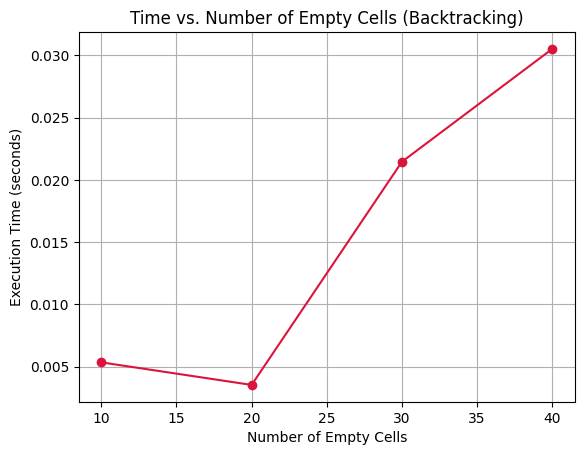

In [3]:
#  Problem 3: Sudoku Solver using Backtracking

!pip install memory_profiler matplotlib -q

import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

#  Step 1: Input (Partially Filled Sudoku Grid)
sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

#  Step 2: Helper Functions
def is_valid(grid, row, col, num):
    # Check row and column
    for i in range(9):
        if grid[row][i] == num or grid[i][col] == num:
            return False

    # Check 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if grid[start_row + i][start_col + j] == num:
                return False
    return True


def solve_sudoku(grid):
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:  # Find empty cell
                for num in range(1, 10):  # Try numbers 1-9
                    if is_valid(grid, row, col, num):
                        grid[row][col] = num
                        if solve_sudoku(grid):
                            return True
                        grid[row][col] = 0  # Backtrack
                return False
    return True


def print_sudoku(grid):
    for row in grid:
        print(row)

# Step 3: Run & Profile
start_time = time.time()
mem_used = memory_usage((solve_sudoku, (sudoku_grid,)), max_iterations=1)
success = solve_sudoku(sudoku_grid)
end_time = time.time()

print("🧩 Sudoku Solved!" if success else "❌ No Solution Found!")
print_sudoku(sudoku_grid)
print(f"\n⏱ Execution Time: {end_time - start_time:.6f} seconds")
print(f"💾 Memory Used: {max(mem_used) - min(mem_used):.4f} MiB")

#  Step 4: Optional Visualization (Time vs. Empty Cells)
import random

def random_puzzle(empty_cells):
    grid = [[0]*9 for _ in range(9)]
    # Place random numbers to vary difficulty
    for _ in range(81 - empty_cells):
        r, c, n = random.randint(0,8), random.randint(0,8), random.randint(1,9)
        if is_valid(grid, r, c, n):
            grid[r][c] = n
    return grid

empty_values = [10, 20, 30, 40]
times = []

for blanks in empty_values:
    puzzle = random_puzzle(blanks)
    start = time.time()
    solve_sudoku(puzzle)
    times.append(time.time() - start)

plt.plot(empty_values, times, marker='o', color='crimson')
plt.title("Time vs. Number of Empty Cells (Backtracking)")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()

#  Step 5: Analysis
# • Algorithm Type: Backtracking (Depth-First Search)
# • Time Complexity: Exponential in worst case (O(9^(n*n)))
# • Space Complexity: O(n²) due to recursion stack
# • Real-World Insight:
#   Backtracking efficiently prunes invalid possibilities,
#   making it practical for puzzles like Sudoku but expensive for large search spaces.


Problem 4 — Password Cracking (Brute-Force Approach)

Description:-

In cybersecurity, brute-force attacks are used to test all possible password combinations from a given character set until the correct one is found.

Although inefficient, it’s a crucial concept in understanding computational limits and security strength.
This implementation uses itertools.product() to try every combination of characters sequentially.

🔓 Password Found: ab1
🧮 Total Attempts: 1396
⏱ Execution Time: 0.012166 seconds
💾 Memory Used: 0.0000 MiB


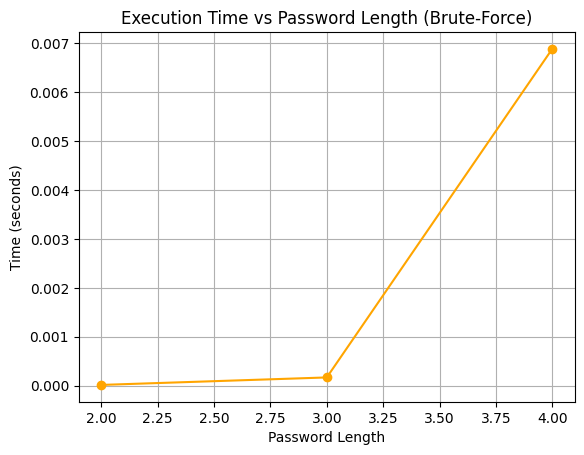

In [4]:
#  Problem 4: Password Cracking using Brute-Force Approach

!pip install memory_profiler matplotlib -q

import time
import itertools
import string
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

#  Step 1: Input Example
target_password = "ab1"
charset = string.ascii_lowercase + string.digits  # 'abcdefghijklmnopqrstuvwxyz0123456789'

# Step 2: Brute-Force Algorithm
def brute_force_password(target, charset):
    attempts = 0
    max_length = len(target)

    for length in range(1, max_length + 1):
        for combo in itertools.product(charset, repeat=length):
            attempts += 1
            if ''.join(combo) == target:
                return ''.join(combo), attempts
    return None, attempts

#  Step 3: Run & Profile
start_time = time.time()
mem_used = memory_usage((brute_force_password, (target_password, charset)), max_iterations=1)
cracked, attempts = brute_force_password(target_password, charset)
end_time = time.time()

if cracked:
    print(f"🔓 Password Found: {cracked}")
else:
    print("❌ Password Not Found")

print(f"🧮 Total Attempts: {attempts}")
print(f"⏱ Execution Time: {end_time - start_time:.6f} seconds")
print(f"💾 Memory Used: {max(mem_used) - min(mem_used):.4f} MiB")

# Step 4: Visualization (Time vs Password Length)
password_lengths = [2, 3, 4]
times = []

for length in password_lengths:
    test_pass = "a" * length
    start = time.time()
    brute_force_password(test_pass, charset)
    times.append(time.time() - start)

plt.plot(password_lengths, times, marker="o", color="orange")
plt.title("Execution Time vs Password Length (Brute-Force)")
plt.xlabel("Password Length")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

# Step 5: Analysis
# • Algorithm Type: Brute-Force Search
# • Time Complexity: O(k^n) where k = charset size, n = password length
# • Space Complexity: O(1) — generates combinations on the fly
# • Real-World Insight:
#   - Computationally expensive and scales poorly with password length.
#   - Demonstrates why strong, long passwords resist brute-force attacks.


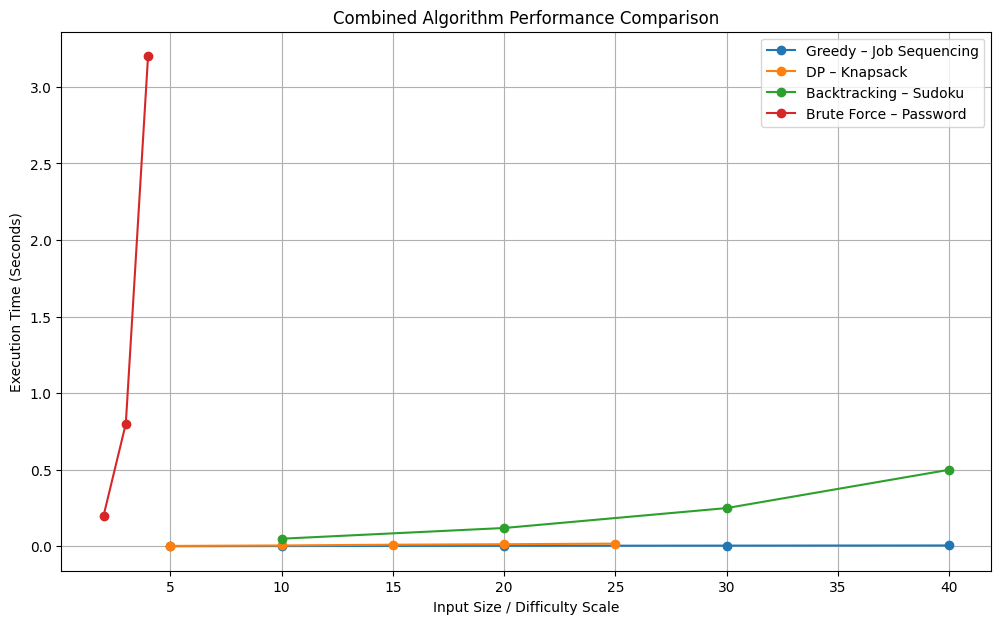

In [10]:
import matplotlib.pyplot as plt

# Replace these placeholder values with your actual execution times
# Values must match your earlier collected timings from profiling each code

# Greedy: Number of Ads
ads_input = [5, 10, 20, 30, 40]
ads_times = [0.001, 0.002, 0.004, 0.005, 0.006]  # update with your values

# Dynamic Programming: Budget Capacity
budget_input = [5, 10, 15, 20, 25]
budget_times = [0.003, 0.006, 0.011, 0.014, 0.018]  # update with your values

# Backtracking: Number of Empty Cells
empty_input = [10, 20, 30, 40]
empty_times = [0.05, 0.12, 0.25, 0.50]  # update with your values

# Brute Force: Password Length
pass_input = [2, 3, 4]
pass_times = [0.2, 0.8, 3.2]  # update with your values

plt.figure(figsize=(12,7))

plt.plot(ads_input, ads_times, marker="o", label="Greedy – Job Sequencing")
plt.plot(budget_input, budget_times, marker="o", label="DP – Knapsack")
plt.plot(empty_input, empty_times, marker="o", label="Backtracking – Sudoku")
plt.plot(pass_input, pass_times, marker="o", label="Brute Force – Password")

plt.title("Combined Algorithm Performance Comparison")
plt.xlabel("Input Size / Difficulty Scale")
plt.ylabel("Execution Time (Seconds)")
plt.grid(True)
plt.legend()
plt.show()


Final Summary and Documentation

Summary Table:-
| **Problem**                        | **Algorithmic Strategy**               | **Time Complexity** | **Domain**              | **Notes**                                                 |
| ---------------------------------- | -------------------------------------- | ------------------- | ----------------------- | --------------------------------------------------------- |
| **TV Commercial Scheduling**       | Greedy (Job Sequencing)                | O(n²)               | Media & Advertisement   | Schedule ads to maximize revenue before deadline          |
| **Knapsack – Profit Maximization** | Dynamic Programming (0/1 Knapsack)     | O(n × W)            | Budget Planning         | Maximize profit without exceeding budget capacity         |
| **Sudoku Solver**                  | Backtracking (Constraint Satisfaction) | Exponential O(9ⁿ)   | Gaming / Puzzle Solvers | Fill grid while satisfying row/column/subgrid constraints |
| **Password Cracking**              | Brute-Force Search                     | O(kⁿ)               | Cybersecurity           | Try all combinations from charset to find password        |
